# LUNG CANCER DETECTION 

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy,categorical_crossentropy, top_k_categorical_accuracy
from keras import backend as k
from keras.layers.convolutional import*
import os
import tensorflow as tf
import random as rn
from matplotlib import pyplot as plt
import itertools
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam,RMSprop
%matplotlib inline
import json

Using TensorFlow backend.


In [3]:
tf.keras.backend.clear_session()

In [4]:
#CREATING VARIABLES AND ASSIGNING PATH
train_path='D:/Sahana/New_Segment/train'
valid_path='D:/Sahana/New_Segment/valid'
test_path='D:/Sahana/New_Segment/test'

In [5]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['0','1'],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['000','111'],batch_size=5)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['11'],batch_size=1)

Found 1082 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 1 images belonging to 1 classes.


In [6]:
#FUNCTION TO DISPLAY THE IMAGES
#plot image with labels
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims) %2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],cmap="CMRmap",interpolation=None if interp else 'none')

FEW IMAGES OF VALID DATASET


C:\Users\Sandhya R K\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


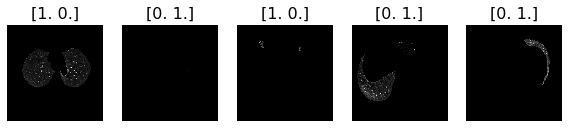

In [7]:
imgs1,labels1=next(valid_batches)
print("FEW IMAGES OF VALID DATASET")
plots(imgs1, titles=labels1)

In [8]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)


In [9]:
time_callback = TimeHistory()

In [10]:
import json
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# ALEXNET ARCHITECTURE

In [11]:
model=Sequential()

model.add(Conv2D(filters=96,input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(4096,input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())


model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())


model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 43, 43, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 256)      

In [12]:
model.compile(Adam(lr=.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=2,
                                  verbose=1,factor=0.2)

filepath="AlexNet_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history= model.fit_generator(train_batches, steps_per_epoch=108,
                              validation_data=valid_batches,validation_steps=44,epochs=25,verbose=1,
                              callbacks=[learn_control, checkpoint,time_callback]
)

Epoch 1/25
108/108 [==============================] - 32s 295ms/step - loss: 0.8337 - accuracy: 0.6856 - val_loss: 1.4049 - val_accuracy: 0.4908

Epoch 00001: val_accuracy improved from -inf to 0.49083, saving model to AlexNet_weights_best.hdf5
Epoch 2/25
108/108 [==============================] - 24s 226ms/step - loss: 0.5951 - accuracy: 0.7743 - val_loss: 1.6537 - val_accuracy: 0.8073

Epoch 00002: val_accuracy improved from 0.49083 to 0.80734, saving model to AlexNet_weights_best.hdf5
Epoch 3/25
108/108 [==============================] - 25s 227ms/step - loss: 0.5305 - accuracy: 0.8125 - val_loss: 0.0271 - val_accuracy: 0.8945

Epoch 00003: val_accuracy improved from 0.80734 to 0.89450, saving model to AlexNet_weights_best.hdf5
Epoch 4/25
108/108 [==============================] - 25s 227ms/step - loss: 0.5699 - accuracy: 0.8004 - val_loss: 0.0015 - val_accuracy: 0.8165

Epoch 00004: val_accuracy did not improve from 0.89450
Epoch 5/25
108/108 [==============================] - 25s 

In [14]:
sum(time_callback.times)

665.7675433158875

In [15]:
import pandas as pd

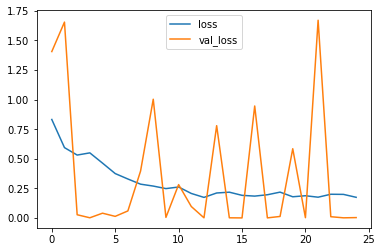

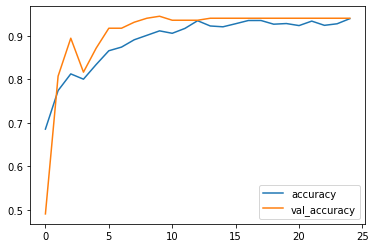

In [16]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()


In [17]:
results = model.evaluate(train_batches)
print("Training set of Images")
print('loss, accuracy', results)

109/109 [==============================] - 4s 34ms/step
Training set of Images
loss, accuracy [1.2519829273223877, 0.9805914759635925]


In [18]:
results1 = model.evaluate(valid_batches)
print("Training set of Images")
print('loss, accuracy', results1)

44/44 [==============================] - 1s 26ms/step
Training set of Images
loss, accuracy [0.003050908213481307, 0.9403669834136963]


# LOADING AND TESTING MODEL

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model=load_model('AlexNet_weights_best.hdf5')

In [43]:
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['11'],batch_size=1)

Found 1 images belonging to 1 classes.


In [22]:
results = model.evaluate(train_batches)
print("Training set of Images")
print('loss, accuracy', results)

  ...
    to  
  ['...']
109/109 [==============================] - 4s 35ms/step - loss: 0.1029 - accuracy: 0.9713
Training set of Images
loss, accuracy [0.10291121384222915, 0.97134936]


In [23]:
results1 = model.evaluate(valid_batches)
print("Validating set of Images")
print('loss, accuracy', results1)

  ...
    to  
  ['...']
44/44 [==============================] - 1s 30ms/step - loss: 0.1462 - accuracy: 0.9450
Validating set of Images
loss, accuracy [0.14615608165993102, 0.94495416]


1/1 [==============================] - 0s 342ms/step


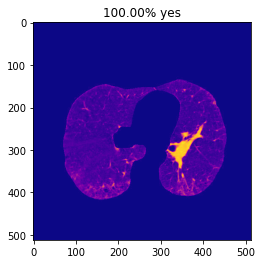

In [44]:
import matplotlib.image as mpimg
# Predicting

probabilities =model.predict_generator(test_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img,cmap="plasma")
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()

In [33]:
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['000'],batch_size=1)

Found 1 images belonging to 1 classes.


1/1 [==============================] - 0s 24ms/step


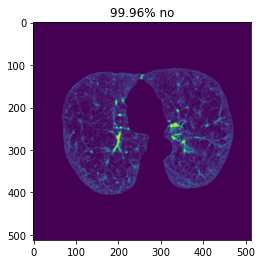

In [34]:
import matplotlib.image as mpimg
# Predicting

probabilities =model.predict_generator(test_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()